# Advanced inputs and outputs

## Dealing with failure

### The map functions fail hard
> log_list <- map(long_list, log)

Error in .f(.x[[i]], ...) : non-numeric argument to mathematical function

### Introducing safely()

> log_list <- map(long_list, safely(log))


Combining safely() with log will ensure that the log function succeed and it also gives the error messages


### safely() takes a function and returns a function

```
library(purrr)

safe_log <- safely(log)

safe_log
```

### safely() never fails

safely() always returns a list with two elements: result and error


### Other adverbs for unusual output

* safely() captures the successful result or the error, always returns a list
* possibly() always succeeds, you give it a default value to return when there is an error
* quietly() captures printed output, messages, and warnings instead of capturing errors

### Creating a safe function

In [1]:
library(purrr)
# Create safe_readLines() by passing readLines() to safely()
safe_readLines <- safely(readLines)

# Call safe_readLines() on "http://example.org"
safe_readLines("http://example.org")

# Call safe_readLines() on "http://asdfasdasdkfjlda"
safe_readLines("http://asdfasdasdkfjlda")

Warning message:
"package 'purrr' was built under R version 3.4.3"

$result
 [1] "<!doctype html>"                                                                                      
 [2] "<html>"                                                                                               
 [3] "<head>"                                                                                               
 [4] "    <title>Example Domain</title>"                                                                    
 [5] ""                                                                                                     
 [6] "    <meta charset=\"utf-8\" />"                                                                       
 [7] "    <meta http-equiv=\"Content-type\" content=\"text/html; charset=utf-8\" />"                        
 [8] "    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1\" />"                       
 [9] "    <style type=\"text/css\">"                                                                        
[10] "    b

Warning message in file(con, "r"):
"InternetOpenUrl failed: 'The server name or address could not be resolved'"

$result
NULL

$error
<simpleError in file(con, "r"): cannot open the connection>


### Using map safely

In [2]:
urls <- list(
  example = "http://example.org",
  rproj = "http://www.r-project.org",
  asdf = "http://asdfasdasdkfjlda"
)

# Define safe_readLines()
safe_readLines <- safely(readLines)

# Use the safe_readLines() function with map(): html
html <- map(urls, safe_readLines)

# Call str() on html
str(html)

# Extract the result from one of the successful elements
html[[1]][1]

# Extract the error from the element that was unsuccessful
html[[3]][2]

Warning message in file(con, "r"):
"InternetOpenUrl failed: 'The server name or address could not be resolved'"

List of 3
 $ example:List of 2
  ..$ result: chr [1:50] "<!doctype html>" "<html>" "<head>" "    <title>Example Domain</title>" ...
  ..$ error : NULL
 $ rproj  :List of 2
  ..$ result: chr [1:119] "<!DOCTYPE html>" "<html lang=\"en\">" "  <head>" "    <meta charset=\"utf-8\">" ...
  ..$ error : NULL
 $ asdf   :List of 2
  ..$ result: NULL
  ..$ error :List of 2
  .. ..$ message: chr "cannot open the connection"
  .. ..$ call   : language file(con, "r")
  .. ..- attr(*, "class")= chr [1:3] "simpleError" "error" "condition"


$result
 [1] "<!doctype html>"                                                                                      
 [2] "<html>"                                                                                               
 [3] "<head>"                                                                                               
 [4] "    <title>Example Domain</title>"                                                                    
 [5] ""                                                                                                     
 [6] "    <meta charset=\"utf-8\" />"                                                                       
 [7] "    <meta http-equiv=\"Content-type\" content=\"text/html; charset=utf-8\" />"                        
 [8] "    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1\" />"                       
 [9] "    <style type=\"text/css\">"                                                                        
[10] "    body {"                                                                                           
[11] "        background-color: #f0f0f2;"                                                                   
[12] "        margin: 0;"                                                                                   
[13] "        padding: 0;"                                                                                  
[14] "        font-family: \"Open Sans\", \"Helvetica Neue\", Helvetica, Arial, sans-serif;"                
[15] "        "                                                                                             
[16] "    }"                                                                                                
[17] "    div {"                                                                                            
[18] "        width: 600px;"                                                                                
[19] "        margin: 5em auto;"                                                                            
[20] "        padding: 50px;"                                                                               
[21] "        background-color: #fff;"                                                                      
[22] "        border-radius: 1em;"                                                                          
[23] "    }"                                                                                                
[24] "    a:link, a:visited {"                                                                              
[25] "        color: #38488f;"                                                                              
[26] "        text-decoration: none;"                                                                       
[27] "    }"                                                                                                
[28] "    @media (max-width: 700px) {"                                                                      
[29] "        body {"                                                                                       
[30] "            background-color: #fff;"                                                                  
[31] "        }"                                                                                            
[32] "        div {"                                                                                        
[33] "            width: auto;"                                                                             
[34] "            margin: 0 auto;"                                                                          
[35] "            border-radius: 0;"                                                                        
[36] "            padding: 1em;"                                                                            
[37] "        }"                                                    

$error
<simpleError in file(con, "r"): cannot open the connection>


### Working with safe output

In [3]:
# Define save_readLines() and html
safe_readLines <- safely(readLines)
html <- map(urls, safe_readLines)

# Examine the structure of transpose(html)
str(transpose(html))

# Extract the results: res
res <- transpose(html)[["result"]]

# Extract the errors: errs
errs <- transpose(html)[["error"]]

Warning message in file(con, "r"):
"InternetOpenUrl failed: 'The server name or address could not be resolved'"

List of 2
 $ result:List of 3
  ..$ example: chr [1:50] "<!doctype html>" "<html>" "<head>" "    <title>Example Domain</title>" ...
  ..$ rproj  : chr [1:119] "<!DOCTYPE html>" "<html lang=\"en\">" "  <head>" "    <meta charset=\"utf-8\">" ...
  ..$ asdf   : NULL
 $ error :List of 3
  ..$ example: NULL
  ..$ rproj  : NULL
  ..$ asdf   :List of 2
  .. ..$ message: chr "cannot open the connection"
  .. ..$ call   : language file(con, "r")
  .. ..- attr(*, "class")= chr [1:3] "simpleError" "error" "condition"


### Working with errors and results

In [4]:
# Initialize some objects
safe_readLines <- safely(readLines)
html <- map(urls, safe_readLines)
res <- transpose(html)[["result"]]
errs <- transpose(html)[["error"]]

# Create a logical vector is_ok
is_ok <- map_lgl(errs, is_null)

# Extract the successful results
res[is_ok]

# Extract the input from the unsuccessful results
urls[!is_ok]

Warning message in file(con, "r"):
"InternetOpenUrl failed: 'The server name or address could not be resolved'"

$example
 [1] "<!doctype html>"                                                                                      
 [2] "<html>"                                                                                               
 [3] "<head>"                                                                                               
 [4] "    <title>Example Domain</title>"                                                                    
 [5] ""                                                                                                     
 [6] "    <meta charset=\"utf-8\" />"                                                                       
 [7] "    <meta http-equiv=\"Content-type\" content=\"text/html; charset=utf-8\" />"                        
 [8] "    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1\" />"                       
 [9] "    <style type=\"text/css\">"                                                                        
[10] "    body {"                                                                                           
[11] "        background-color: #f0f0f2;"                                                                   
[12] "        margin: 0;"                                                                                   
[13] "        padding: 0;"                                                                                  
[14] "        font-family: \"Open Sans\", \"Helvetica Neue\", Helvetica, Arial, sans-serif;"                
[15] "        "                                                                                             
[16] "    }"                                                                                                
[17] "    div {"                                                                                            
[18] "        width: 600px;"                                                                                
[19] "        margin: 5em auto;"                                                                            
[20] "        padding: 50px;"                                                                               
[21] "        background-color: #fff;"                                                                      
[22] "        border-radius: 1em;"                                                                          
[23] "    }"                                                                                                
[24] "    a:link, a:visited {"                                                                              
[25] "        color: #38488f;"                                                                              
[26] "        text-decoration: none;"                                                                       
[27] "    }"                                                                                                
[28] "    @media (max-width: 700px) {"                                                                      
[29] "        body {"                                                                                       
[30] "            background-color: #fff;"                                                                  
[31] "        }"                                                                                            
[32] "        div {"                                                                                        
[33] "            width: auto;"                                                                             
[34] "            margin: 0 auto;"                                                                          
[35] "            border-radius: 0;"                                                                        
[36] "            padding: 1em;"                                                                            
[37] "        }"                                                   

$asdf
[1] "http://asdfasdasdkfjlda"

## Maps over multiple arguments

### Drawing sampels from a Normal

```
rnorm(5)
rnorm(10)
rnorm(20)

map(list(5, 10, 20), rnorm)

# What's rnorm function?
rnorm(n, mean = 0, sd = 1)
```

### Use map2() to iterate over two arguments

```
rnorm(5, mean = 1)
rnorm(10, mean = 5)
rnorm(20, mean = 10)

map2(list(5, 10, 20), list(1, 5, 10),rnorm)

# Arguments of map2
map2(.x, .y, .f, ...) 
```
### pmap() to iterate over many arguments

```
rnorm(5, mean = 1, sd = 0.1)
rnorm(10, mean = 5, sd = 0.5)
rnorm(20, mean = 10, sd = 0.1)

pmap(list(n = list(5, 10, 20),
          mean = list(1, 5, 10),
          sd = list(0.1, 0.5, 0,1)), rnorm)
          
# Arguments of pmap
pmap(.l, .f, ...)
```

### invoke_map() to iterate over functions

```
rnorm(5)
runif(5)
rexp(5)

invoke_map(list(rnorm, runif, rexp), n = 5)

# Arguments of invoke_map: all functions should take the same arguments
invoke_map(.f, .x = list(NULL), ...)
```

### Mapping over many arguments: provided by Perl

* map2() - iterate over two arguments
* pmap() - iterate over many arguments
* invoke_map() - iterate over functions and arguments
* Like map(), each has a whole family of functions:
    - map2_dbl(), map2_lgl(), pmap_dbl(), etc.

### Getting started

In [5]:
# Create a list n containing the values: 5, 10, and 20
n <- list(5, 10, 20)

# Call map() on n with rnorm() to simulate three samples
map(n, rnorm)

[[1]]
[1] -1.1138697 -1.3173001 -1.1764751 -0.3690917 -0.5109144

[[2]]
 [1] -0.1341801 -1.3502322  0.5907344 -1.0264572 -0.2004392 -1.4829401
 [7] -0.8600488  1.4251996 -1.4607705 -0.5070708

[[3]]
 [1]  1.16585102  1.52480235 -2.70888239 -0.97520200 -1.95342769 -0.36710331
 [7] -1.60360997 -0.40814543  0.06504147  1.82418404  0.09999961 -0.19280271
[13] -0.75541380  0.27892437 -0.62898810  0.59440414  1.94698346  0.23919792
[19] -0.21481981 -0.79699589

### Mapping over two arguments

In [6]:
# Initialize n
n <- list(5, 10, 20)

# Create a list mu containing the values: 1, 5, and 10
mu <- list(1, 5, 10)

# Edit to call map2() on n and mu with rnorm() to simulate three samples
# map(n, rnorm)
map2(n, mu, rnorm)

[[1]]
[1]  2.0625444  0.4885316  0.6524279  2.9374984 -0.5449991

[[2]]
 [1] 4.091469 4.221370 3.856171 4.868491 5.368097 4.697934 4.678793 6.288447
 [9] 5.387364 5.642399

[[3]]
 [1]  9.902580 10.004569 11.440182 10.125658 10.092365 10.381842 11.114431
 [8]  9.991463  9.692586 11.355809  8.327530  9.795178  9.657470 12.339391
[15] 10.017638  9.086905  9.281096 11.361824 10.876115  8.855956

### Mapping over more than two arguments

In [7]:
# Initialize n and mu
n <- list(5, 10, 20)
mu <- list(1, 5, 10)

# Create a sd list with the values: 0.1, 1 and 0.1
sd <- list(0.1, 1, 0.1)

# Edit this call to pmap() to iterate over the sd list as well
# pmap(list(n, mu), rnorm)
pmap(list(n, mu, sd), rnorm)

[[1]]
[1] 0.8552897 0.9885456 1.3168026 1.0599239 0.9482966

[[2]]
 [1] 5.402341 4.180403 3.778347 4.627772 5.814187 4.302243 3.988538 5.132771
 [9] 4.453429 4.086553

[[3]]
 [1] 10.011194 10.035999 10.024318 10.133898  9.922194 10.039402  9.892140
 [8]  9.935863 10.068469 10.057591  9.940189  9.753138 10.063577  9.893841
[15] 10.115998 10.104806 10.137061 10.081949 10.013800  9.871053

### Argument matching

In [8]:
# Name the elements of the argument list
# pmap(list(mu, n, sd), rnorm)
pmap(list(mean = mu, n = n, sd = sd), rnorm)

[[1]]
[1] 1.0014810 0.9199807 1.0196289 0.9557568 1.0208949

[[2]]
 [1] 4.863457 4.701725 2.403628 7.220082 5.188958 3.203671 4.407391 4.207466
 [9] 6.313629 5.950259

[[3]]
 [1]  9.968509  9.941031 10.028428  9.962307  9.940329 10.052278 10.172223
 [8]  9.917052  9.989833  9.906597  9.905527  9.995749 10.003234  9.888785
[15]  9.996654 10.099848 10.020120 10.007243 10.037905  9.919049

### Mapping over functions and their arguments

In [9]:
# Define list of functions
f <- list("rnorm", "runif", "rexp")

# Parameter list for rnorm()
rnorm_params <- list(mean = 10)

# Add a min element with value 0 and max element with value 5
runif_params <- list(min = 0, max = 5)

# Add a rate element with value 5
rexp_params <- list(rate = 5)

# Define params for each function
params <- list(
  rnorm_params,
  runif_params,
  rexp_params
)

# Call invoke_map() on f supplying params as the second argument
# invoke_map(f, n = 5)
invoke_map(f, params, n = 5)

[[1]]
[1] 10.368346  9.745817  9.409537 10.054883 10.671908

[[2]]
[1] 3.56396415 0.06191773 4.93327282 1.28537051 1.88380986

[[3]]
[1] 0.057011981 0.861665473 1.070912466 0.009094309 0.333000273

## Maps with side effects

### Side effects

* Describe things that happen beyond the result of a function
* Examples include: printing output, plotting, and saving files to disk
* walk() works just like map(), but is designed for functions called for their side effects

### Introducing walk()

```
x <- list(1, "a", 3)

x %>% walk(print)

# Use ggplot2 and create a list of plots
library(ggplot2)
plots <- cyl %>%
             map(~ ggplot(., aes(mpg, wt)) + geom_point())

paths <- paste0(names(plots), ".pdf")

walk2(path, plots, ggsave)
```

### Return value of walk()

```
x <- list(1, "a", 3)

out <- x %>% walk(print)

str(out)
```

### walk() in a pipeline

```
lengths <- x %>% walk(print) %>% map_dbl(length)

lengths
```

### Walk

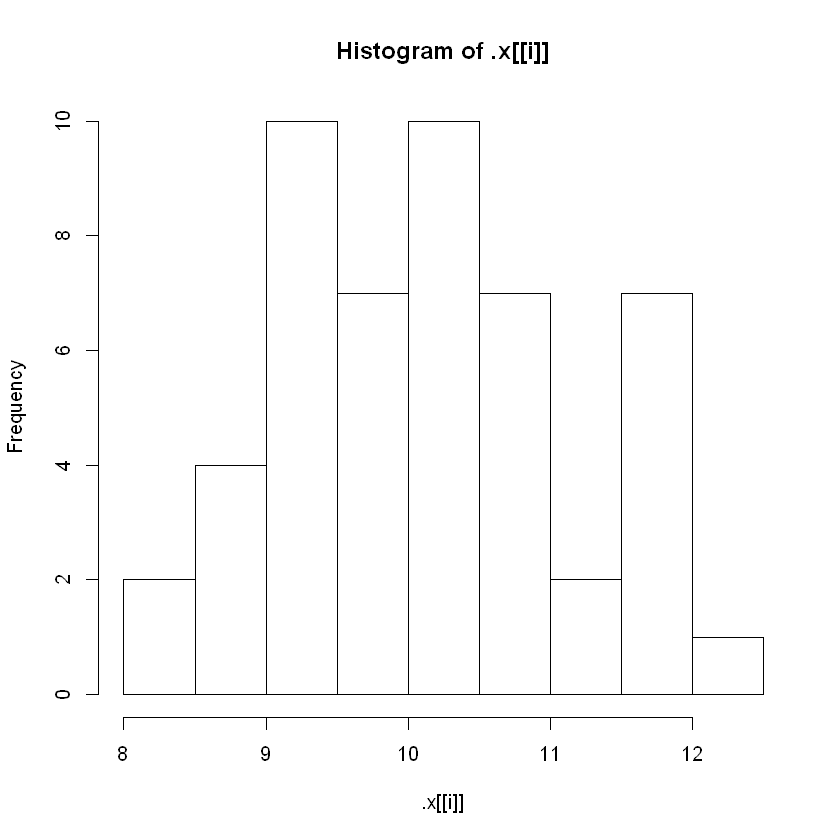

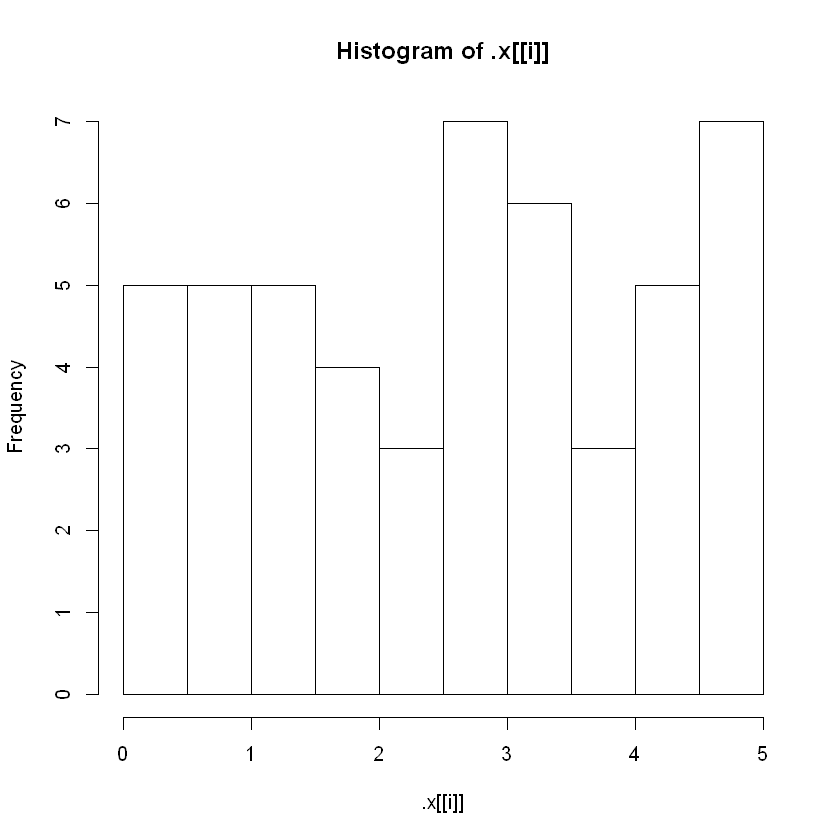

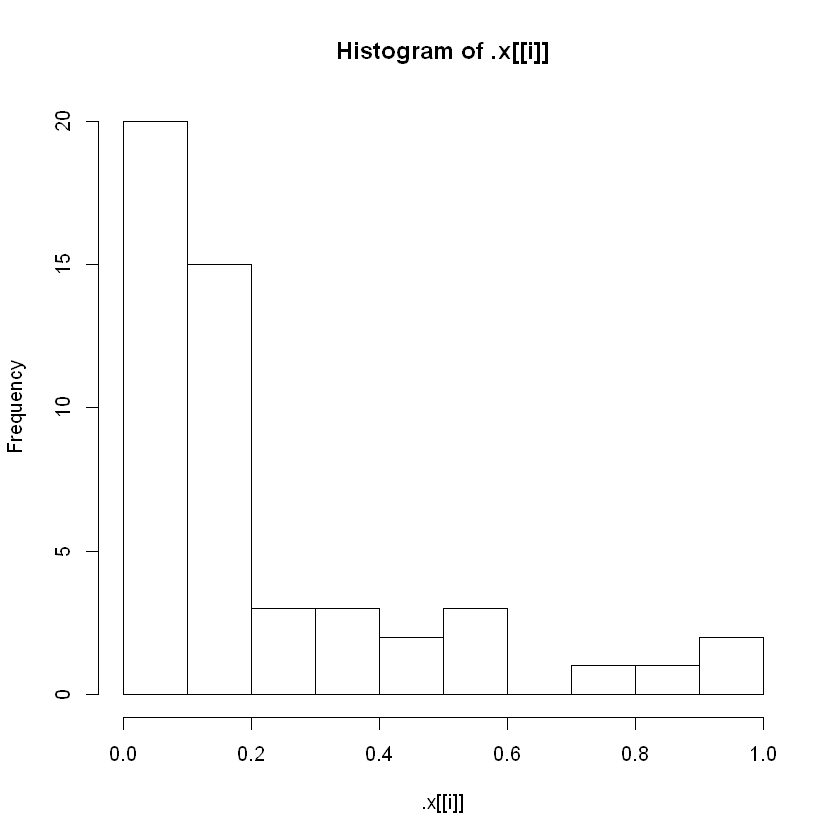

In [11]:
# Define list of functions
f <- list(Normal = "rnorm", Uniform = "runif", Exp = "rexp")

# Define params
params <- list(
  Normal = list(mean = 10),
  Uniform = list(min = 0, max = 5),
  Exp = list(rate = 5)
)

# Assign the simulated samples to sims
# invoke_map(f, params, n = 50)
sims <- invoke_map(f, params, n = 50)

# Use walk() to make a histogram of each element in sims
sims %>% walk(hist)

### Walking over two or more arguments

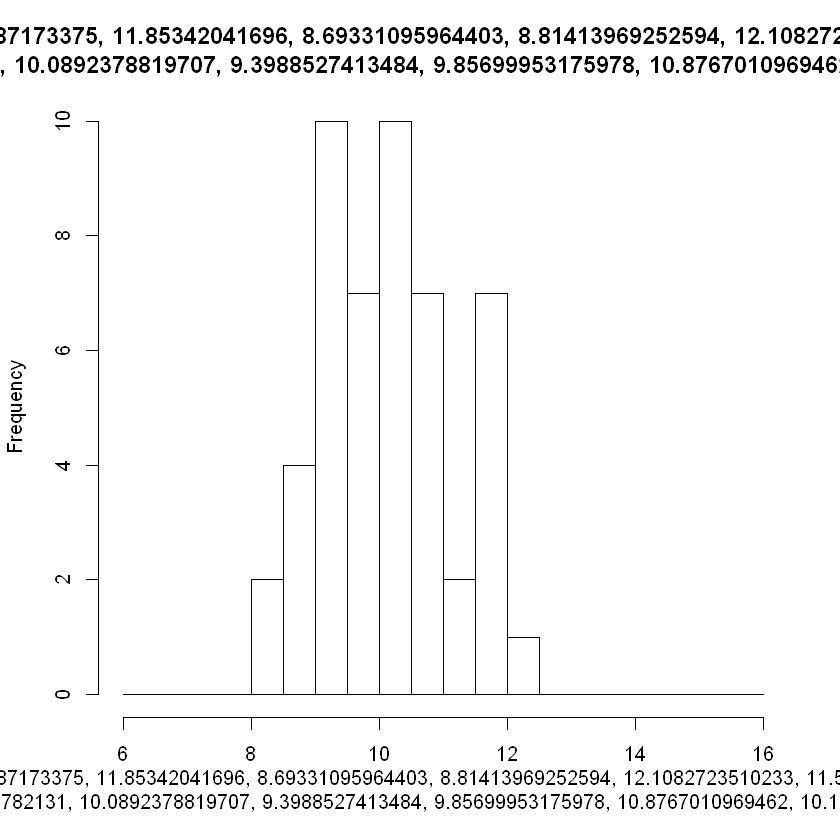

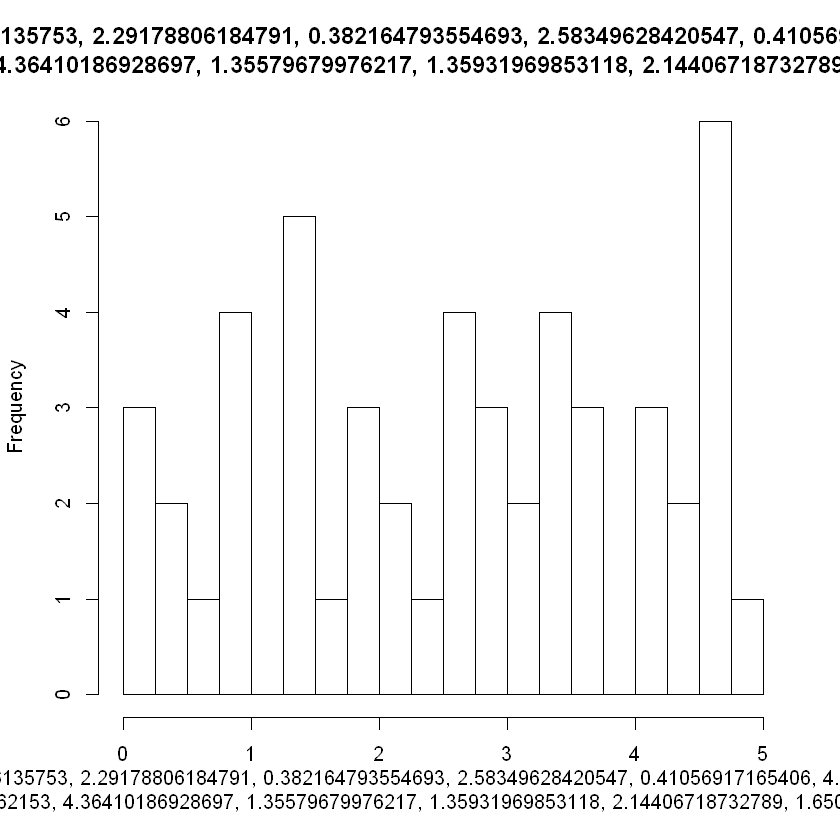

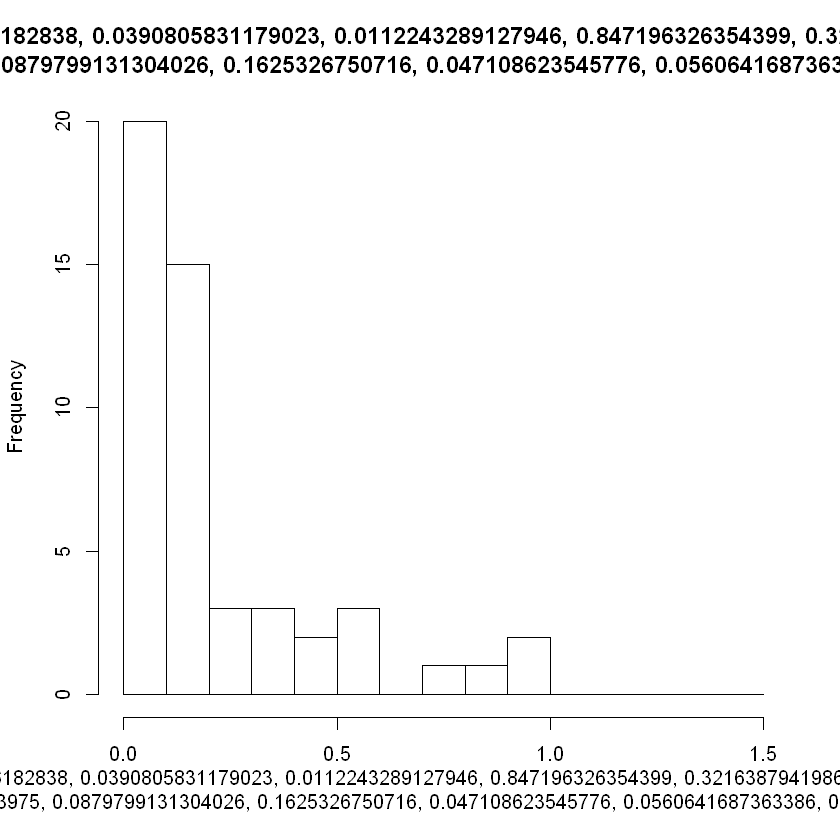

In [12]:
# Replace "Sturges" with reasonable breaks for each sample
# breaks_list <- list(
#   Normal = "Sturges",
#   Uniform = "Sturges",
#   Exp = "Sturges"
# )
breaks_list <- list(
 Normal = seq(6, 16, 0.5),
 Uniform = seq(0, 5, 0.25),
 Exp = seq(0, 1.5, 0.1)
)

# Use walk2() to make histograms with the right breaks
walk2(sims, breaks_list, hist)

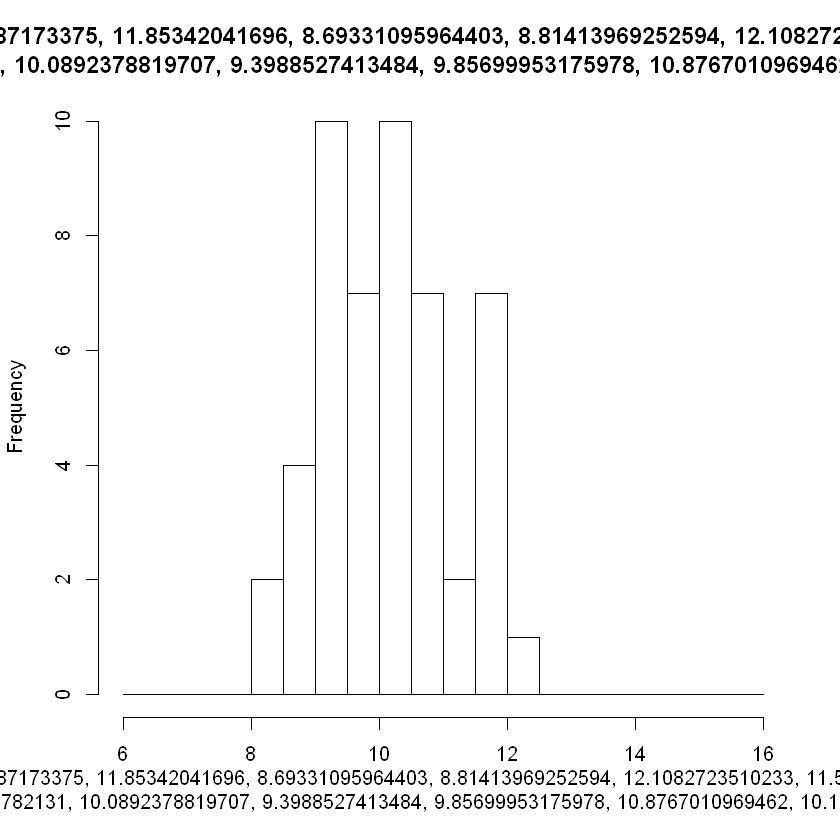

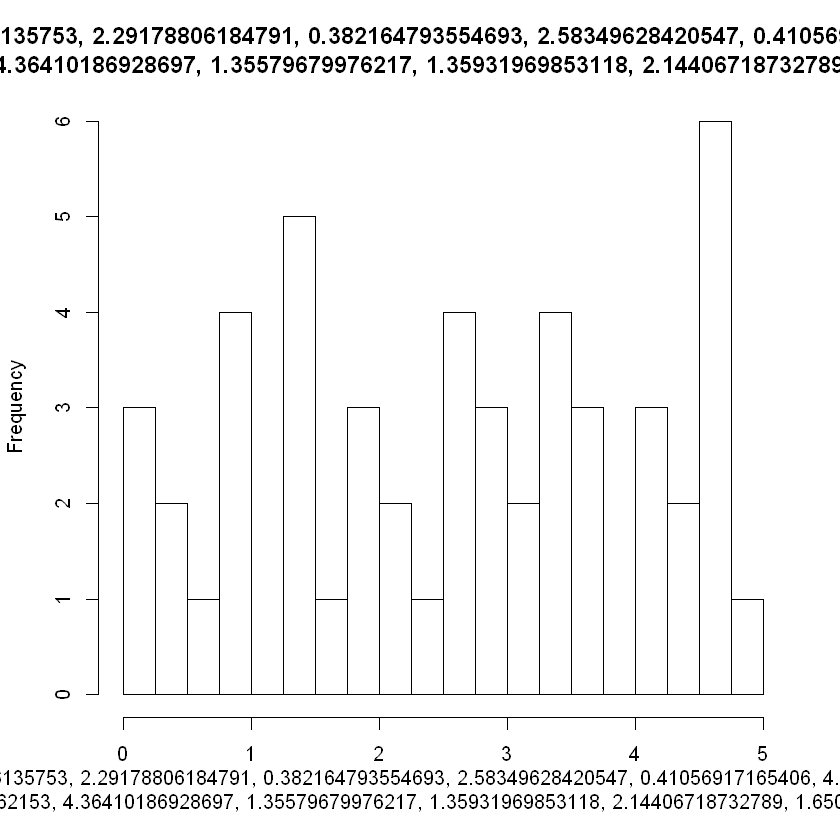

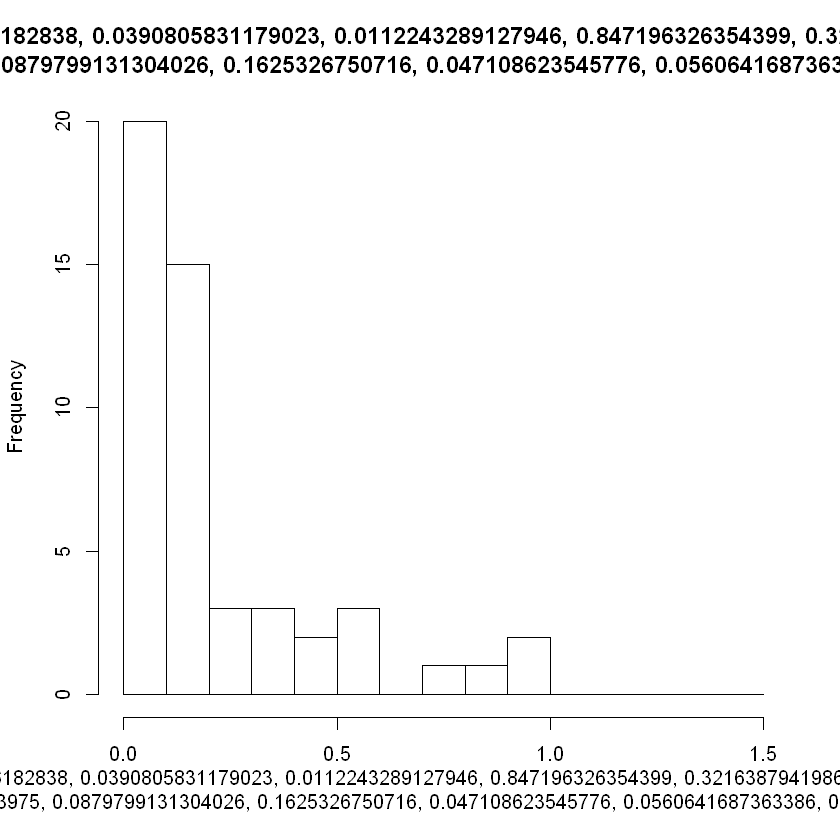

In [13]:
sims %>% walk2(breaks_list, hist)

### Putting together writing functions and walk

In [14]:
class(sims)

[1] "list"

In [15]:
# Turn this snippet into find_breaks()

#   rng <- range(sims[[1]], na.rm = TRUE)
#   seq(rng[1], rng[2], length.out = 30)
find_breaks <- function(x) {
    rng <- range(x, na.rm = TRUE)
    seq(rng[1], rng[2], length.out = 30)
}
    

# Call find_breaks() on sims[[1]]
find_breaks(sims[[1]])

[1]  8.059359  8.198977  8.338594  8.478212  8.617830  8.757448  8.897065
 [8]  9.036683  9.176301  9.315918  9.455536  9.595154  9.734771  9.874389
[15] 10.014007 10.153625 10.293242 10.432860 10.572478 10.712095 10.851713
[22] 10.991331 11.130948 11.270566 11.410184 11.549802 11.689419 11.829037
[29] 11.968655 12.108272

### Nice breaks for all

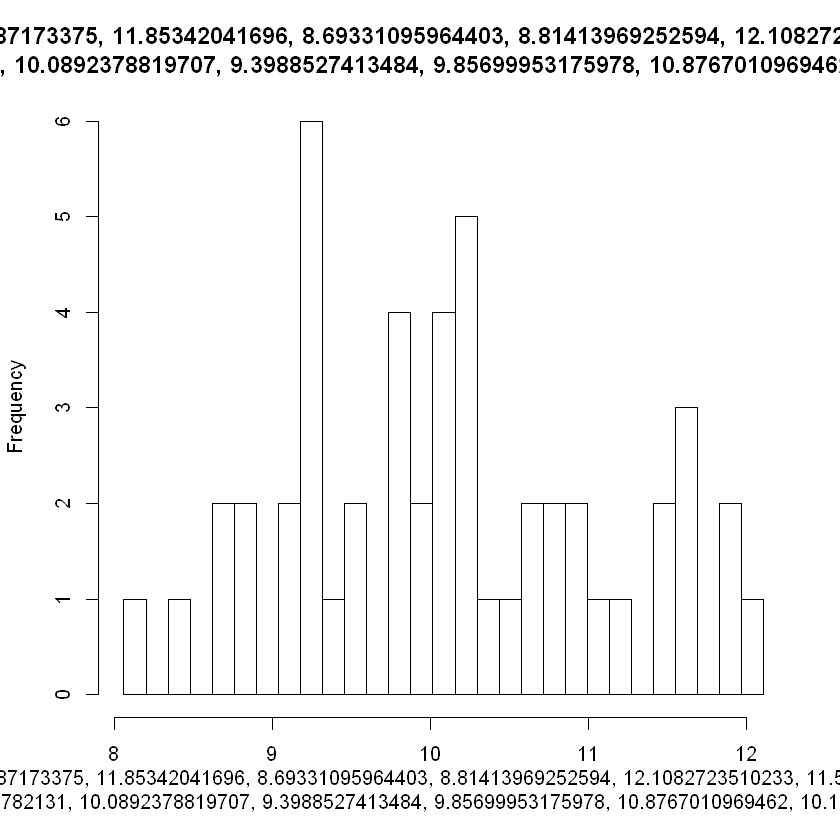

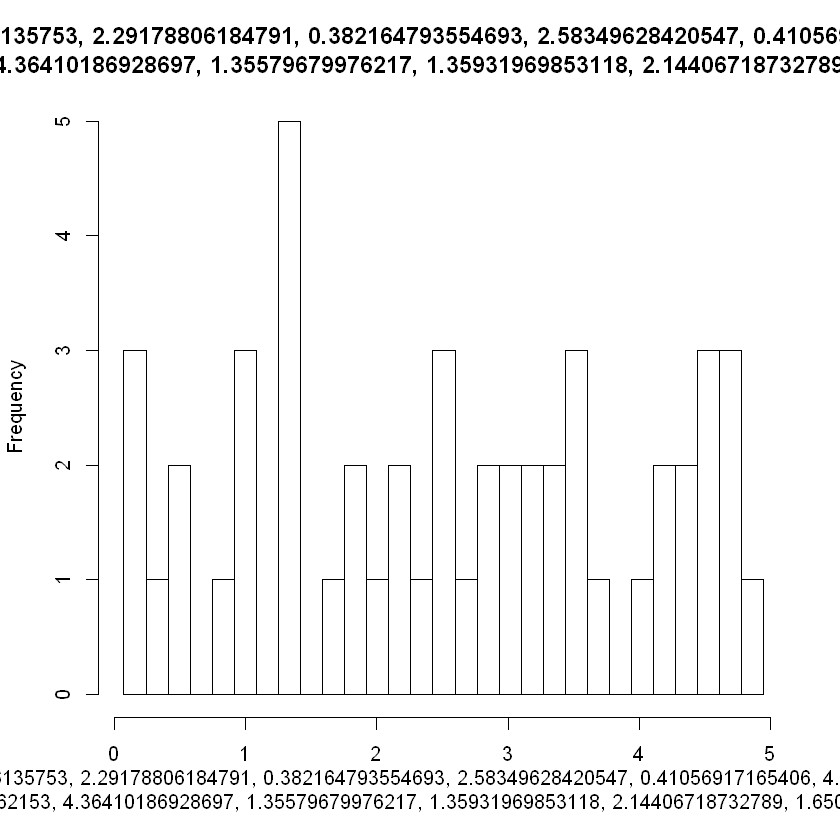

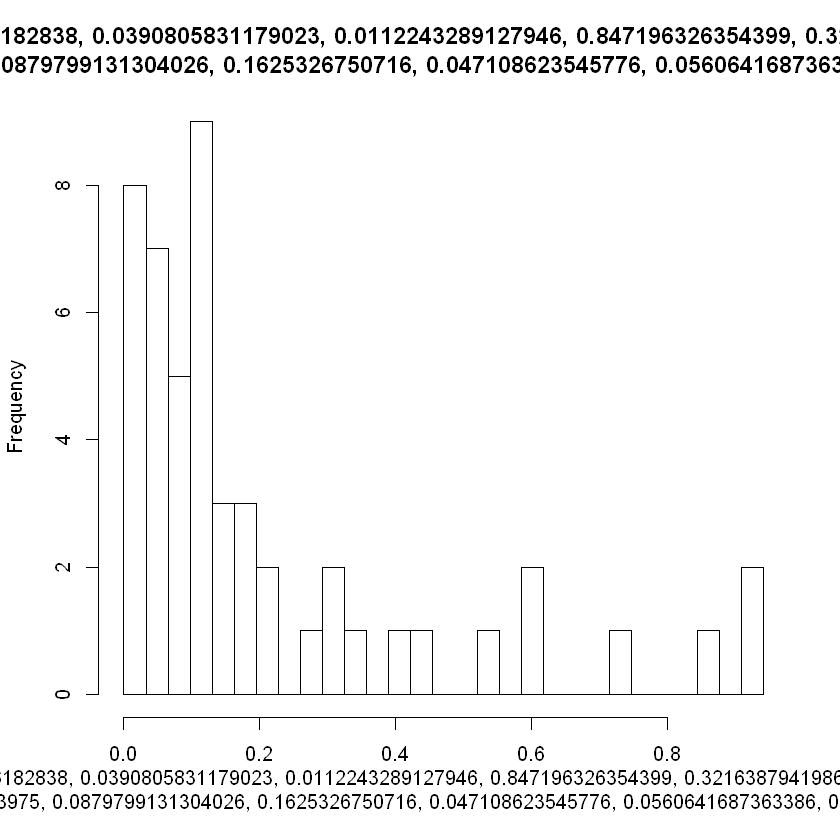

In [16]:
# Use map() to iterate find_breaks() over sims: nice_breaks
nice_breaks <- map(sims, find_breaks)

# Use nice_breaks as the second argument to walk2()
walk2(sims, nice_breaks, hist)


### Walking with many arguments: pwalk

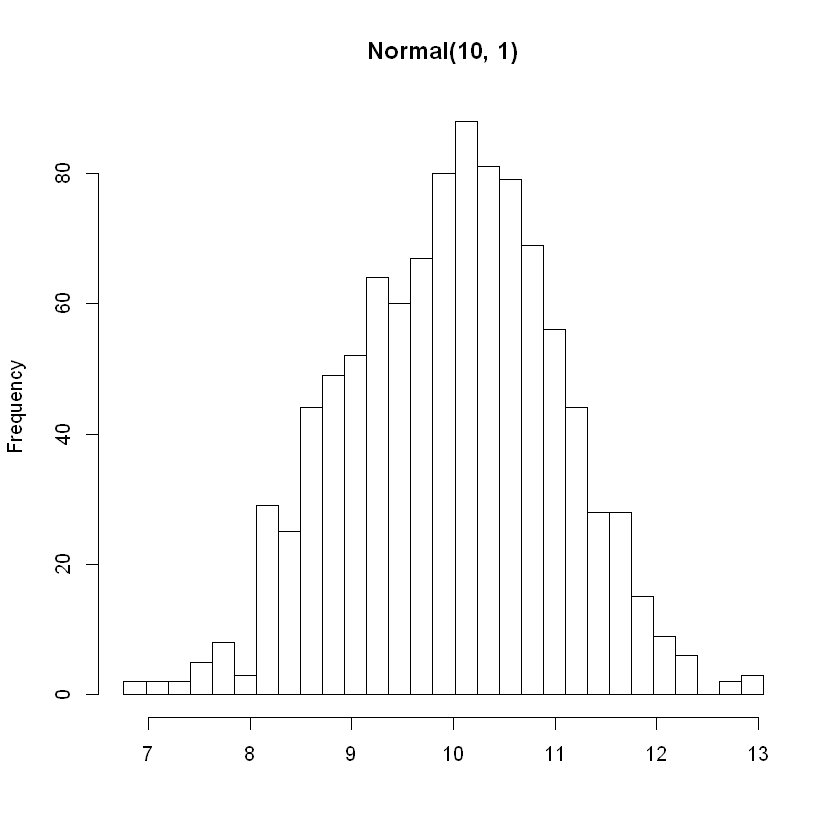

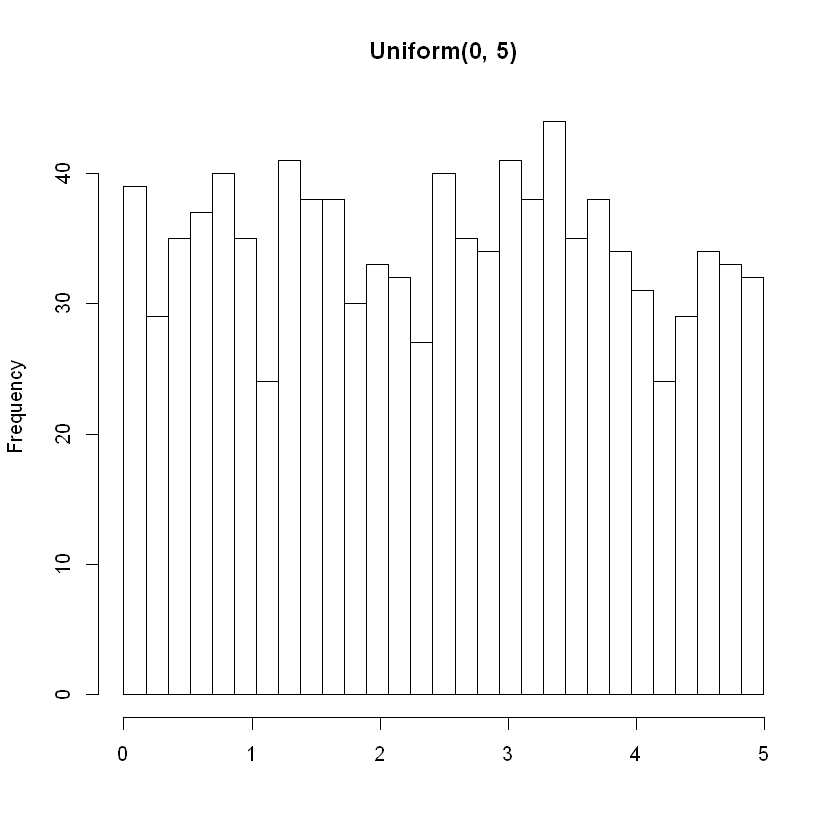

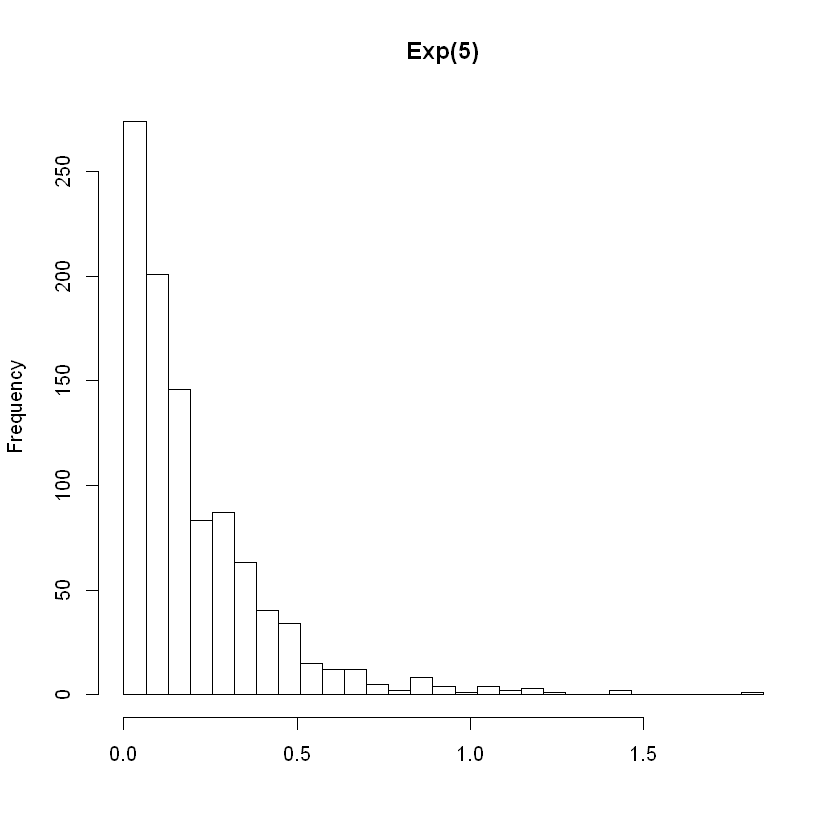

In [17]:
# Increase sample size to 1000
# sims <- invoke_map(f, params, n = 50)
sims <- invoke_map(f, params, n = 1000)

# Compute nice_breaks (don't change this)
nice_breaks <- map(sims, find_breaks)

# Create a vector nice_titles
nice_titles <- c("Normal(10, 1)", "Uniform(0, 5)", "Exp(5)")

# Use pwalk() instead of walk2()
# walk2(sims, nice_breaks, hist, xlab = "")
pwalk(list(x = sims, breaks = nice_breaks, main = nice_titles),
      hist, xlab = "")

### Walking with pipes

In [18]:
# Pipe this along to map(), using summary() as .f
# sims %>%
#   walk(hist) %>%
sims %>%
  map(summary)

$Normal
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.757   9.254  10.043   9.979  10.691  13.056 

$Uniform
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000458 1.256255 2.495968 2.462926 3.623501 4.994365 

$Exp
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000251 0.0564812 0.1419010 0.2045854 0.2873781 1.8484862 
